In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [33]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [34]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

## Initialize Configs

In [35]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income_10K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '99df3a37-a84e-4824-bbe7-cc25fc0e4bd5'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [36]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [37]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [38]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(456, 33)

In [39]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 23:30:28.593,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.798177,1.000000,0.000000,0.797311,1.000000,0.000000,0.802986,1.000000,0.000000,0.800200
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-22 23:30:28.604,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.751551,1.000000,0.000000,0.761026,1.000000,0.000000,0.754732,1.000000,0.000000,0.757800
12,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.801292,1.000000,0.000000,0.801793,1.000000,0.000000,0.804164,1.000000,0.000000,0.803000
13,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.762941,1.000000,0.000000,0.776821,1.000000,0.000000,0.757659,1.000000,0.000000,0.767000
24,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 23:30:28.593,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.739507,0.699812,0.896497,0.743438,0.705575,0.892378,0.731341,0.692011,0.891643,0.737280
25,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-22 23:30:28.604,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.769787,0.728289,0.895319,0.762299,0.723372,0.886262,0.771658,0.729389,0.901726,0.767096
36,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.701523,0.657737,0.878093,0.703738,0.662220,0.871691,0.693416,0.649695,0.872950,0.698483
37,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.732000,0.685992,0.880071,0.723057,0.680093,0.872600,0.736412,0.689100,0.884328,0.729901
48,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 23:30:28.593,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.796320,1.000000,0.000000,0.764050,1.000000,0.000000,0.813187,1.000000,0.000000,0.791571
49,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-22 23:30:28.604,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.665350,1.000000,0.000000,0.583780,1.000000,0.000000,0.704305,1.000000,0.000000,0.656454


In [40]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [41]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
12,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.801292,1.000000,0.000000,0.801793,1.000000,0.000000,0.804164,1.000000,0.000000,0.803000
36,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.701523,0.657737,0.878093,0.703738,0.662220,0.871691,0.693416,0.649695,0.872950,0.698483
60,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.801704,1.000000,0.000000,0.772717,1.000000,0.000000,0.816018,1.000000,0.000000,0.796907
84,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.194213,0.000000,1.000000,0.199806,0.000000,1.000000,0.190110,0.000000,1.000000,0.194288
108,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.203175,0.000000,1.000000,0.197044,0.000000,1.000000,0.202457,0.000000,1.000000,0.199500
132,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.067763,0.062887,0.087428,0.067187,0.062601,0.085737,0.067162,0.062163,0.087692,0.067174
156,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.078708,0.054928,0.174600,0.078280,0.054722,0.173576,0.075116,0.053378,0.164380,0.076669
180,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.888775,0.923966,0.746864,0.888091,0.923237,0.745920,0.895158,0.926935,0.764674,0.891689
204,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.505765,0.511062,0.484401,0.539177,0.556613,0.468646,0.490836,0.490651,0.491595,0.514567
228,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 23:53:57.166,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.712769,0.668285,0.892148,0.714724,0.672545,0.885346,0.704657,0.660208,0.887181,0.709599


In [42]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
13,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.762941,1.000000,0.000000,0.776821,1.000000,0.000000,0.757659,1.000000,0.000000,0.767000
37,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.732000,0.685992,0.880071,0.723057,0.680093,0.872600,0.736412,0.689100,0.884328,0.729901
61,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.661077,1.000000,0.000000,0.583780,1.000000,0.000000,0.694089,1.000000,0.000000,0.650884
85,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.276641,0.000000,1.000000,0.263514,0.000000,1.000000,0.282587,0.000000,1.000000,0.276000
109,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.218465,0.000000,1.000000,0.212295,0.000000,1.000000,0.217336,0.000000,1.000000,0.214571
133,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.067966,0.062867,0.084375,0.066759,0.062037,0.083192,0.068955,0.063875,0.084839,0.067884
157,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.082493,0.059708,0.155822,0.076887,0.055441,0.151536,0.085828,0.062594,0.158468,0.081469
181,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.882939,0.916281,0.775633,0.891071,0.922450,0.781847,0.878367,0.912632,0.771240,0.884560
205,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.583075,0.622411,0.456476,0.612523,0.669494,0.414222,0.567632,0.594608,0.483294,0.589516
229,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 23:53:57.179,99df3a37-a84e-4824-bbe7-cc25fc0e4bd5,Exp_iter_1,...,0.742747,0.696012,0.893156,0.733570,0.689917,0.885510,0.747393,0.699403,0.897431,0.740654


In [43]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [44]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.009697,-0.018652,-0.000756,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.005412,-0.025950,-0.022312,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.009697,0.018652,0.000756,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.087449,1.083765,1.118586,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.086136,0.084161,0.119794,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,-0.002372,0.006712,0.012801,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.992105,1.021922,1.024582,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,0.000025,-0.003962,-0.004415,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,0.000023,-0.002849,-0.002983,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,1.000478,0.942657,0.939523,RandomForestClassifier,Exp_iter_1,0.7,0


In [45]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.009697,-0.018652,-0.000756,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.005412,-0.025950,-0.022312,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.009697,0.018652,0.000756,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.087449,1.083765,1.118586,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.086136,0.084161,0.119794,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [46]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [47]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

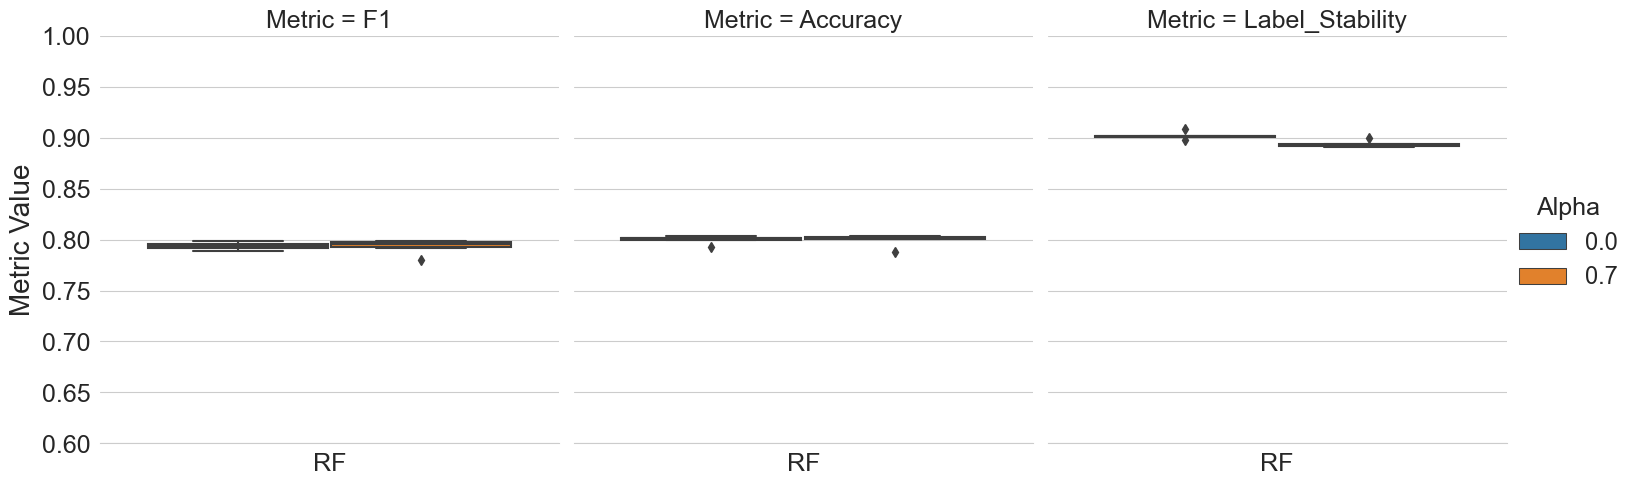

In [48]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

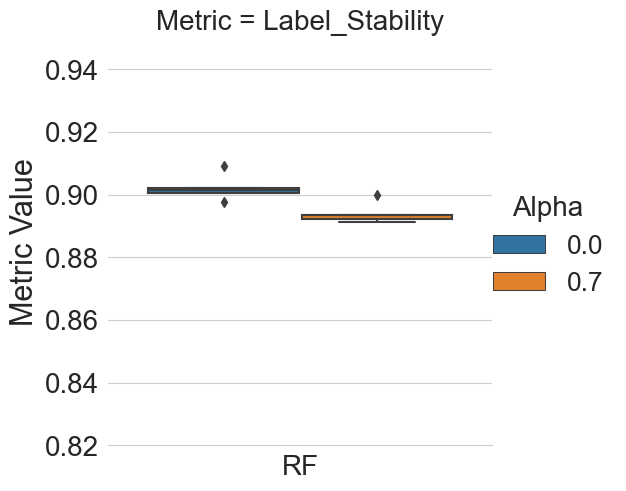

In [49]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

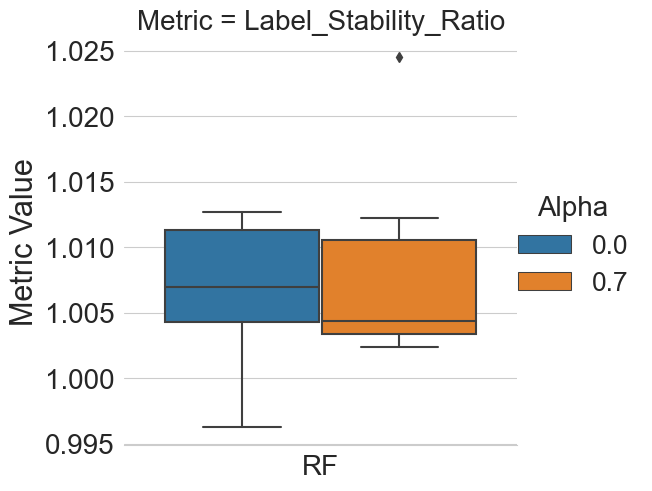

In [50]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

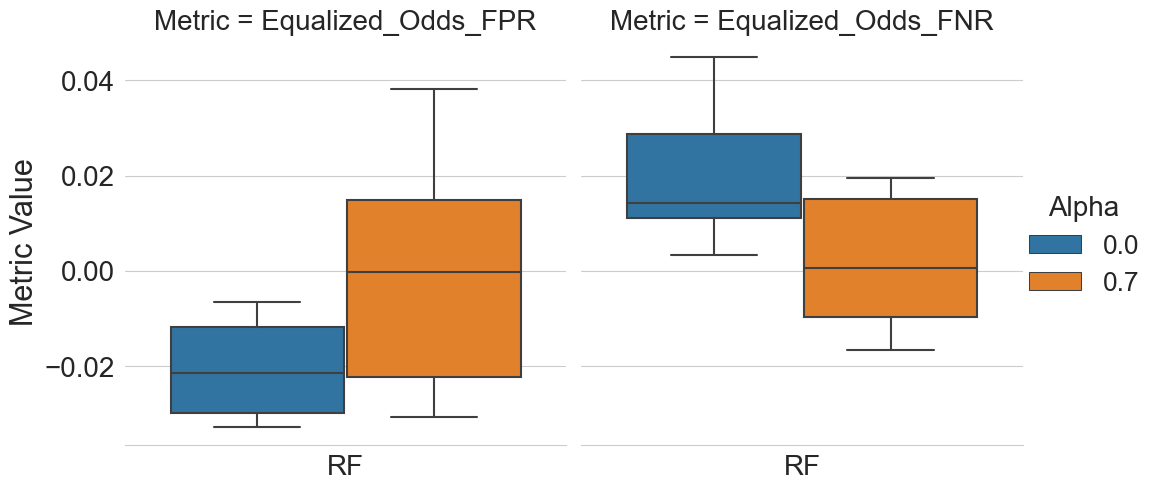

In [51]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [52]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

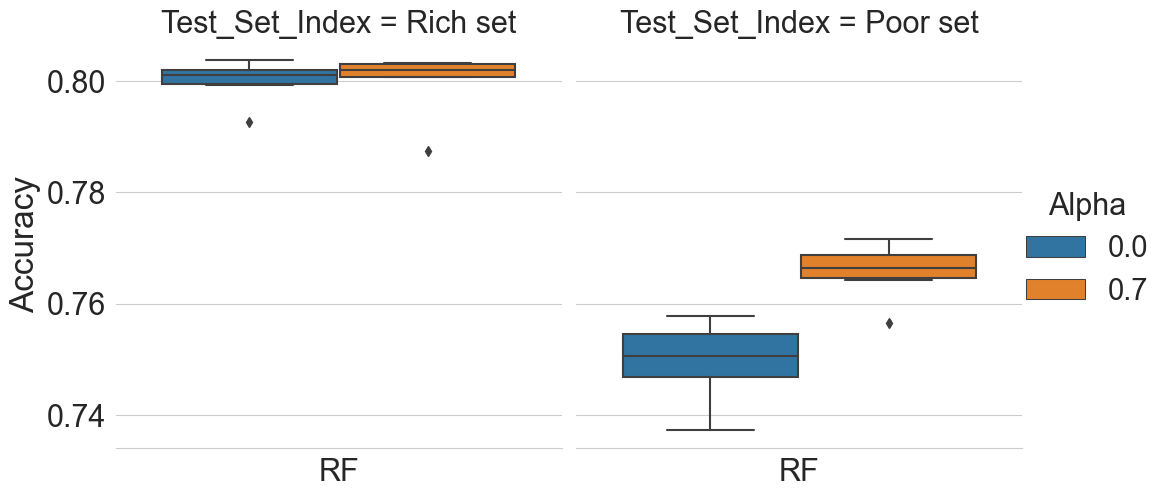

In [53]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

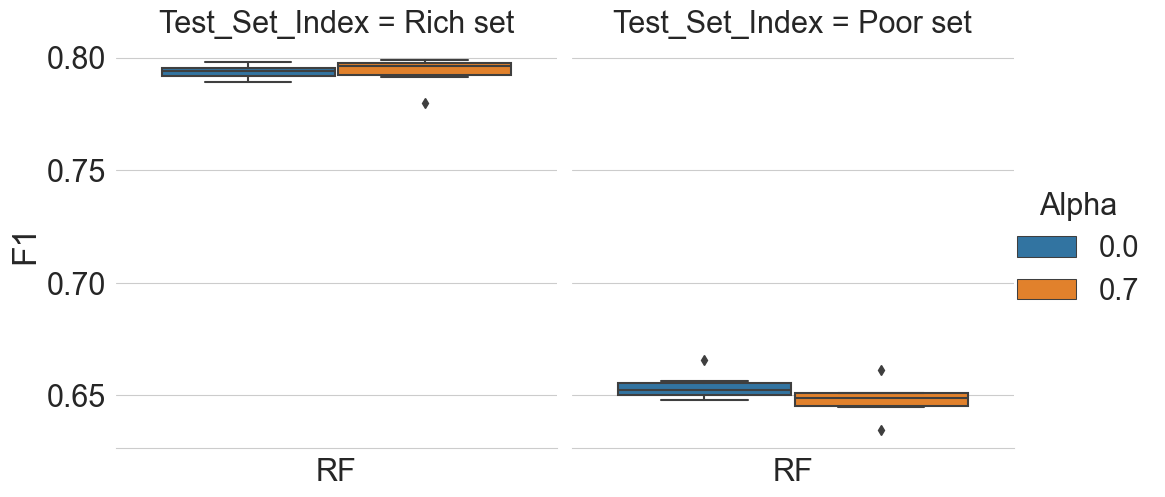

In [54]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

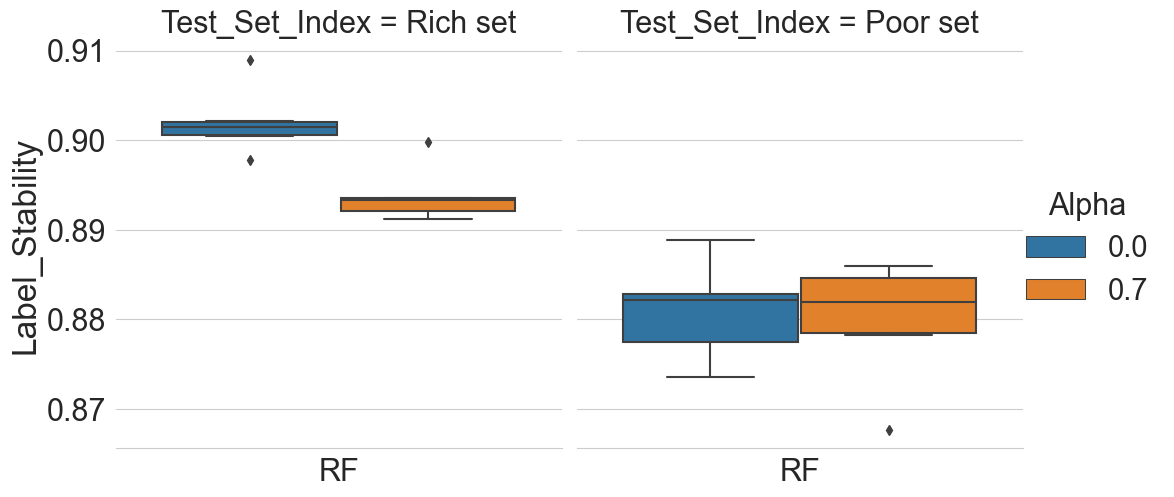

In [55]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

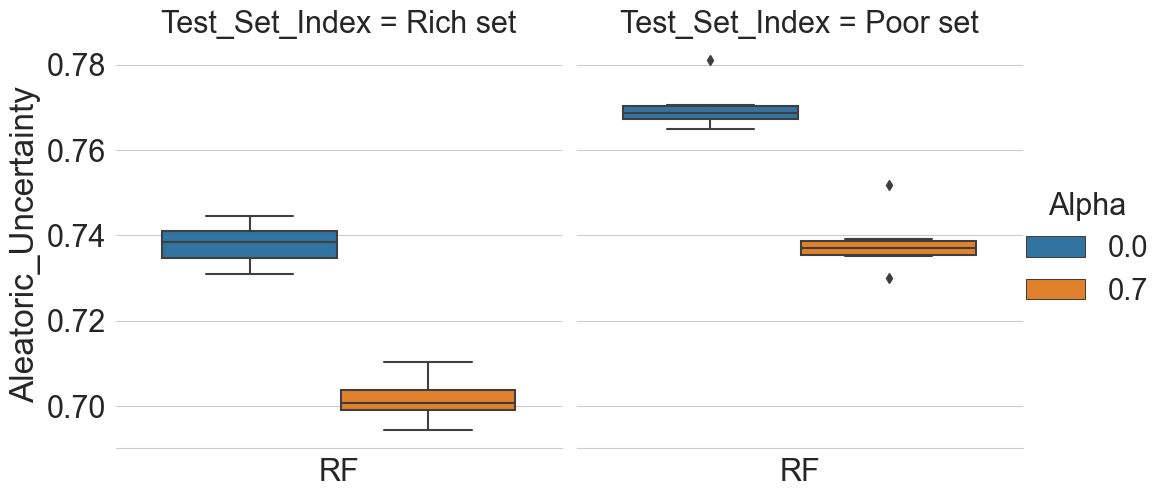

In [56]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

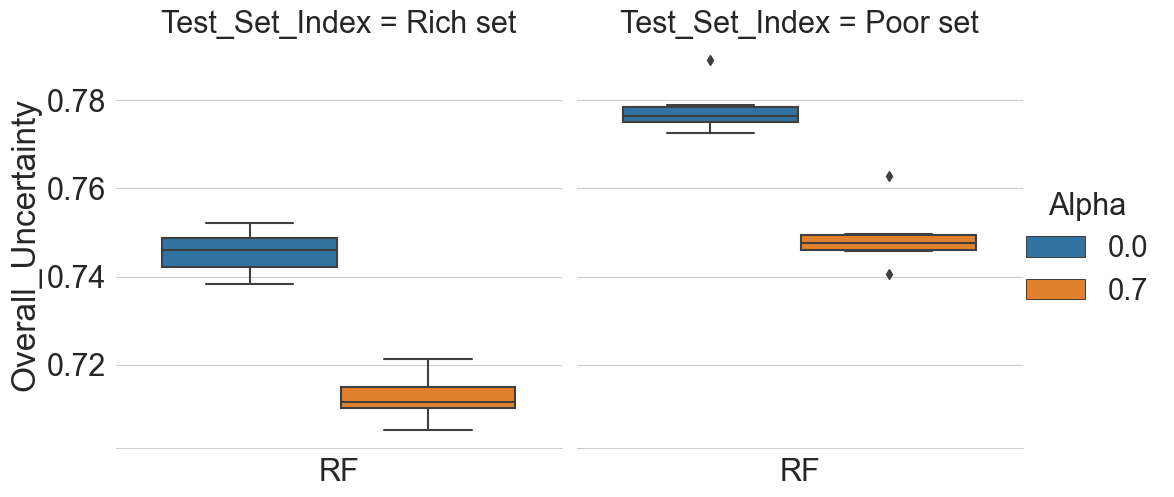

In [57]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

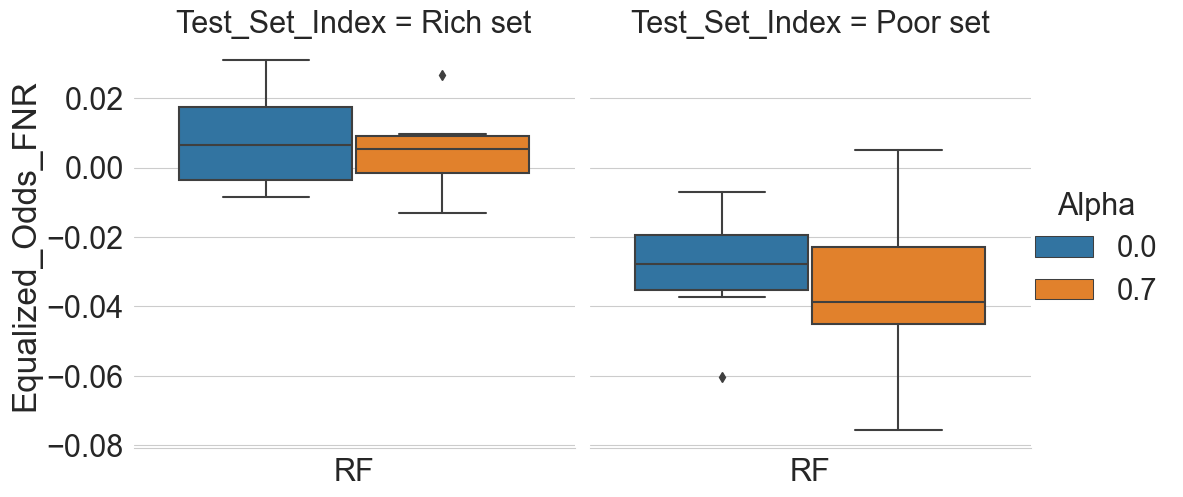

In [58]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

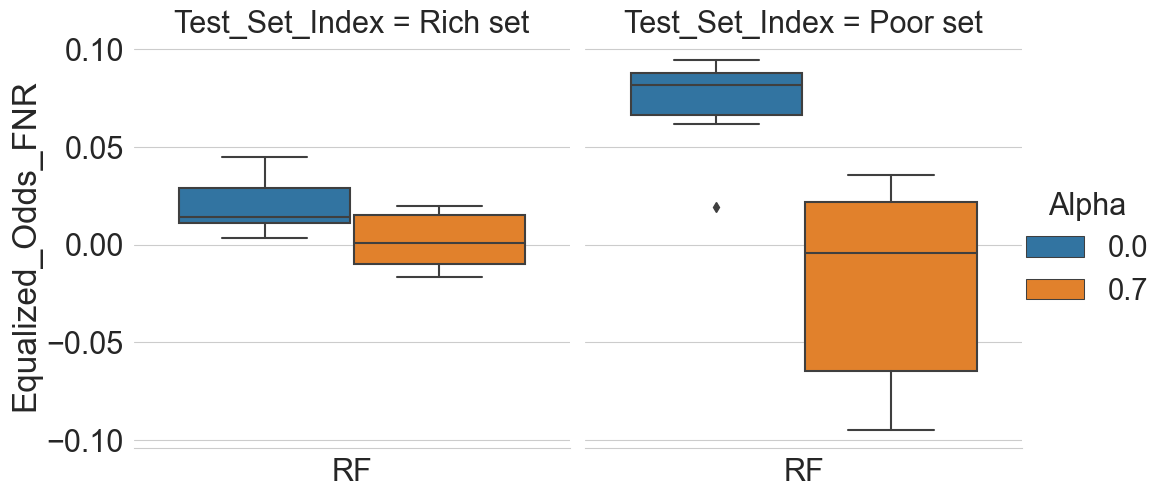

In [59]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

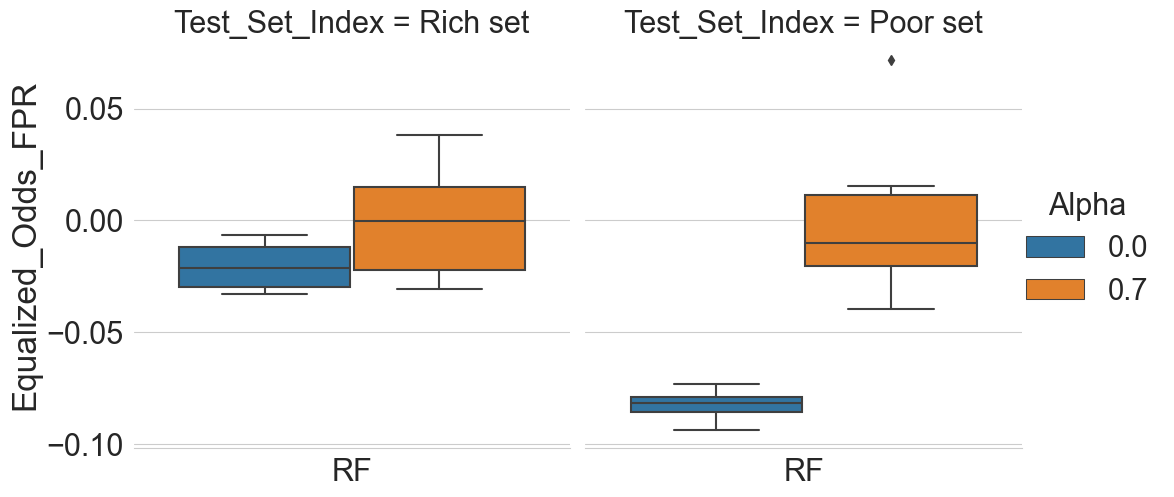

In [60]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)